In [12]:

import histology_features
import numpy 
import skimage
import functools

import matplotlib.pyplot as plt

In [7]:
numpy.random.seed(42)
img = numpy.random.random((4, 4, 3))

rgb_lbp = functools.partial(
    histology_features.multichannel_apply_fn,
    feature_extraction_fn=histology_features.lbp_features,
    channel_axis=-1
)

histology_features.feature_map_blocks2(
    img,
    rgb_lbp,
    window_size=[2, 2, 3],
    radius=[1],
)

/opt/conda/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


array([[[[5., 0., 0., 0., 2., 2., 0., 4., 4., 3., 3., 0.]],

        [[5., 0., 1., 0., 6., 0., 0., 4., 0., 3., 3., 3.]]],


       [[[1., 0., 2., 0., 0., 2., 1., 4., 0., 3., 3., 0.]],

        [[1., 5., 5., 0., 0., 0., 4., 0., 1., 3., 3., 0.]]]])

In [5]:
numpy.random.seed(42)
img = numpy.random.random((4, 4))

feature_map_blocks(
    img,
    lbp_features,
    window_size=[2, 2],
    radius=[1], 
)

array([[[1., 0., 3., 3.],
        [0., 0., 4., 0.]],

       [[1., 0., 0., 3.],
        [5., 0., 1., 3.]]])

In [1]:
numpy.random.seed(42)
img = numpy.random.randint(255, size=(2, 2))
print(img.shape)

output = histology_features.feature_map_blocks(
    img,
    histology_features.haralick_features,
    window_size=[2, 2],
)
output

NameError: name 'numpy' is not defined

array([[[0.44444444],
        [0.55555556]],

       [[0.55555556],
        [0.44444444]]])

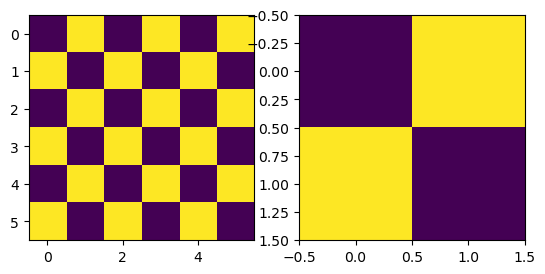

In [45]:
numpy.random.seed(42)
# img = numpy.random.random((4, 4))

img = numpy.indices((6, 6)).sum(axis=0) % 2

out = histology_features.feature_map_overlap_blocks(
    img,
    feature_extract_function=lambda x: [numpy.mean(x)],
    window_size=[3, 3],
    overlap=0.25
)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[1].imshow(out)

out